In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [4]:
file = 'telco_churn.csv'
df = pd.read_csv(file)

copyDf = df.copy()

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum(axis = 0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#no null values. Thats awesome

#convert all entries to lowercase
for column in df.columns:
    try:
        df[column] = df[column].str.lower()
    except:
        print('cannot convert')
        
columnsToConvert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']

for column in columnsToConvert:
    df[column].replace(to_replace="yes", value=1, inplace=True)
    df[column].replace(to_replace='no', value=0, inplace=True)
    
df.head()

cannot convert
cannot convert
cannot convert


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,...,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,...,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,...,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,...,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,...,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [10]:
print(isinstance(df['TotalCharges'][3], float))
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
print(df.dtypes)
isinstance(df['PaymentMethod'][3], str)
print(isinstance(df['TotalCharges'][3], float))

False
customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
True


### Correlation statistic is a measure of linear association between two variables 

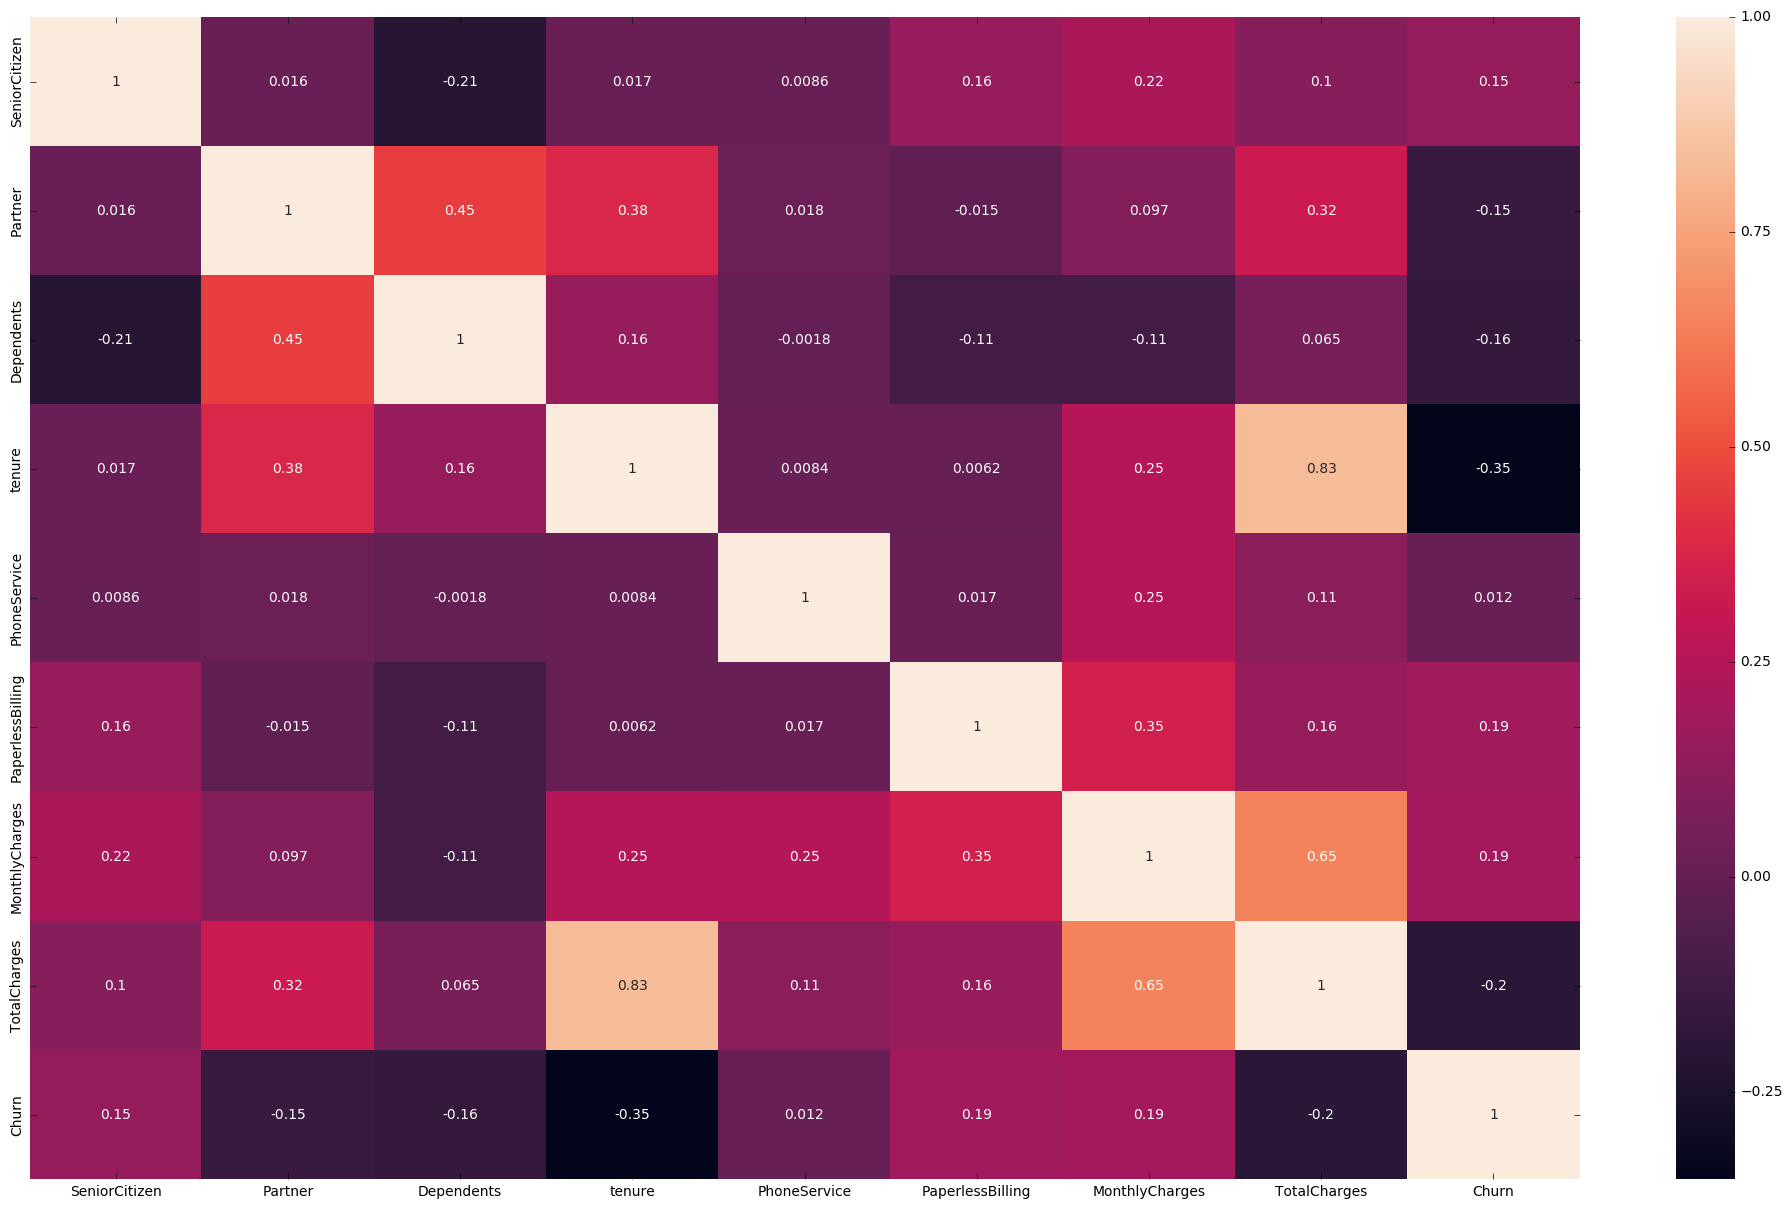

In [112]:
fig = plt.figure(figsize = (25,15))
corr = df.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)

In [12]:
try:
    customer_id = df['customerID']
    del df['customerID'] 
except:
    print("customerid already removed")

### Qualitative variables to quantitative using Dummy Variables

###### Pandas has a function which can convert categorical variables into one-hot encoding

In [13]:
data = pd.get_dummies(df)
data.fillna(value=0, inplace=True)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,56.95,1889.50,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,53.85,108.15,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,42.30,1840.75,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,1,70.70,151.65,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
cols = list(data.columns)
churnIndex = cols.index('Churn')
print(churnIndex)

cols.remove('Churn')
try:
    print(cols.index('Churn'))
except:
    print('Churn not found')


8
Churn not found


In [28]:
x_data = data[data.columns[0:len(data.columns) - 1]].as_matrix().reshape(len(data), len(cols))
y_churn_true = data['Churn']
#print(y_churn_true)

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
       ..
7013    0
7014    0
7015    0
7016    0
7017    0
7018    1
7019    0
7020    0
7021    1
7022    0
7023    0
7024    0
7025    0
7026    1
7027    0
7028    0
7029    0
7030    0
7031    0
7032    1
7033    0
7034    1
7035    0
7036    0
7037    0
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, dtype: int64


# Logistic Regression with scikit learn

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [95]:
train, test = train_test_split(data, test_size=0.7, random_state=5)

In [98]:
y_train = train['Churn']
x_train = train[cols]
x_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_female,gender_male,...,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
300,0,0,0,23,1,1,64.90,1509.80,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5683,0,0,0,39,0,1,50.75,2011.40,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2305,0,1,1,34,1,1,97.70,3410.00,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1087,0,0,0,32,1,0,87.65,2766.40,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4139,1,0,0,24,1,1,80.50,2088.45,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
regression = LogisticRegression()

In [100]:
regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
y_pred = regression.predict(x_train)

In [102]:
print(y_pred)

[0 0 0 ..., 0 0 0]


In [103]:
print(mean_squared_error(y_train, y_pred))

0.184659090909


##### MSE looks good. lower the better performance

In [104]:
y_pred_test = regression.predict(test[cols])

In [105]:
print(y_pred_test)

[0 1 0 ..., 0 0 0]


In [108]:
print(mean_squared_error(test['Churn'], y_pred_test))

0.201581829244


#### Good performance on the test set as well